In [1020]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [1021]:
df=pd.read_excel("trends.xlsx")
df=df.set_index("date")

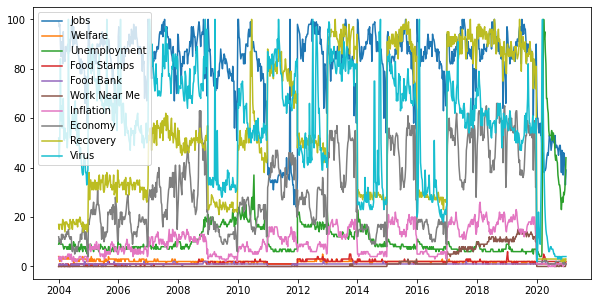

In [1403]:

# tmp=[]
# for i in df.columns:
#     if i not in ['Unemployment']:
#         tmp.append(i)
# df=df.drop(columns=tmp)
plt.figure(figsize=(10, 5))
plt.plot(df)
plt.legend(df.columns)

In [1023]:
unemployment=pd.read_excel("InitialClaims.xls")
t=unemployment['FRED Graph Observations'].tolist()
c=unemployment['Unnamed: 1'].tolist()

In [1024]:
import datetime

time=[]
claims=[]
for i in t:
    if isinstance(i, datetime.datetime):
        time.append(i)
for j in c:
    if isinstance(j,int):
        claims.append(j)


In [1413]:
d={'claims':claims,'date': time}
unemployment=pd.DataFrame(d)
unemployment=unemployment.set_index("date")
unemployment.tail()
unemployment=unemployment.loc['2015-01-10':'2020-12-28']


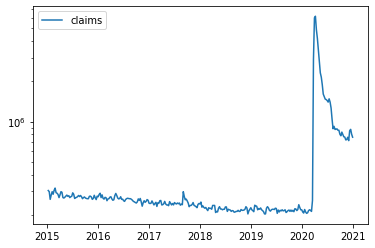

In [1416]:
def difference(dataset, interval=1):
    diff = list()
    index=dataset.index[interval:len(dataset)]
    columns=dataset.columns
    d={}
    for j in range(len(columns)):
        tmp=[]
        for i in range(interval, len(dataset)):
            value = dataset[columns[j]][i] - dataset[columns[j]][i - interval]
            tmp.append(value)
        d[columns[j]]=tmp
    diffs=pd.DataFrame(d)
    diffs=diffs.set_index(index)
    return (diffs)
# unemployment=difference(unemployment)

plt.plot(unemployment)

plt.legend(unemployment.columns)

In [1027]:
df.index = df.index - pd.to_timedelta(1, unit='D')

In [1068]:
unemployment.tail()


,claims
date,
2020-11-28,719000
2020-12-05,853000
2020-12-12,873000
2020-12-19,803000
2020-12-26,763000


In [1029]:
df.tail()

,Jobs,Welfare,Unemployment,Food Stamps,Food Bank,Work Near Me,Inflation,Economy,Recovery,Virus
date,,,,,,,,,,
2020-11-28,46,1,30,2,1,0,1,1,3,4
2020-12-05,45,1,29,2,1,0,1,2,3,4
2020-12-12,42,1,31,2,1,0,1,1,3,4
2020-12-19,33,1,36,1,1,0,1,1,2,4
2020-12-26,39,1,44,2,1,1,1,1,3,4


In [1030]:
mergedDf = df.merge(unemployment, left_index=True, right_index=True)
mergedDf = mergedDf.rename({'claims': 'claimsDifferenced'}, axis=1)
unemployment=unemployment.loc['2004-01-10':'2020-12-28']

In [1228]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

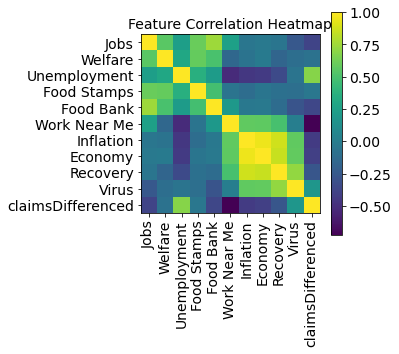

In [1229]:
mergedDf=mergedDf.loc['2010-01-10':'2019-12-28']
show_heatmap(mergedDf)

In [1230]:
n = len(mergedDf)

train_df = mergedDf[0:int(n*0.7)]
val_df = mergedDf[int(n*0.7):int(n*0.9)]
test_df =mergedDf[int(n*0.9):]

num_features = mergedDf.shape[1]

In [1231]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

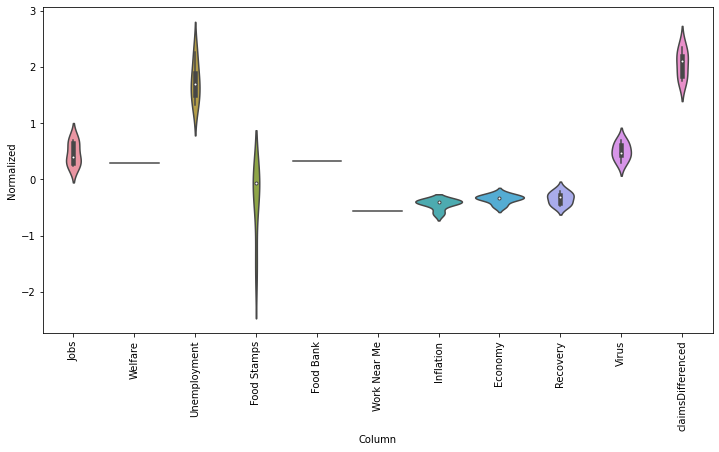

In [1232]:

df_std = (mergedDf - train_mean) / train_std
df_std=df_std[:5]
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(mergedDf.keys(), rotation=90)

In [1036]:
train_df.head()

,Jobs,Welfare,Unemployment,Food Stamps,Food Bank,Work Near Me,Inflation,Economy,Recovery,Virus,claimsDifferenced
date,,,,,,,,,,,
2010-01-16,0.700886,0.298347,2.267352,-0.071217,0.330134,-0.568559,-0.397096,-0.471619,-0.467724,0.602068,2.360984
2010-01-23,0.650233,0.298347,1.885570,-0.071217,0.330134,-0.568559,-0.397096,-0.331711,-0.276349,0.468463,1.830168
2010-01-30,0.396967,0.298347,1.694679,-0.071217,0.330134,-0.568559,-0.397096,-0.261757,-0.199799,0.290324,2.198790
2010-02-06,0.245007,0.298347,1.312896,-0.071217,0.330134,-0.568559,-0.600057,-0.331711,-0.429449,0.423929,1.756444
2010-02-13,0.295661,0.298347,1.503787,-1.527212,0.330134,-0.568559,-0.397096,-0.331711,-0.314624,0.691138,2.095576


In [1037]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [1038]:
w2 = WindowGenerator(input_width=10, label_width=1, shift=1,
                     label_columns=['claimsDifferenced'])
w2

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [10]
Label column name(s): ['claimsDifferenced']

In [1039]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [1114]:
import tensorflow as tf
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(test_df[10:10+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 11, 11)
Inputs shape: (3, 10, 11)
labels shape: (3, 1, 1)


In [1115]:
w2.example = example_inputs, example_labels

AttributeError: can't set attribute

In [1116]:
def plot(self, model=None, plot_col='claimsDifferenced', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

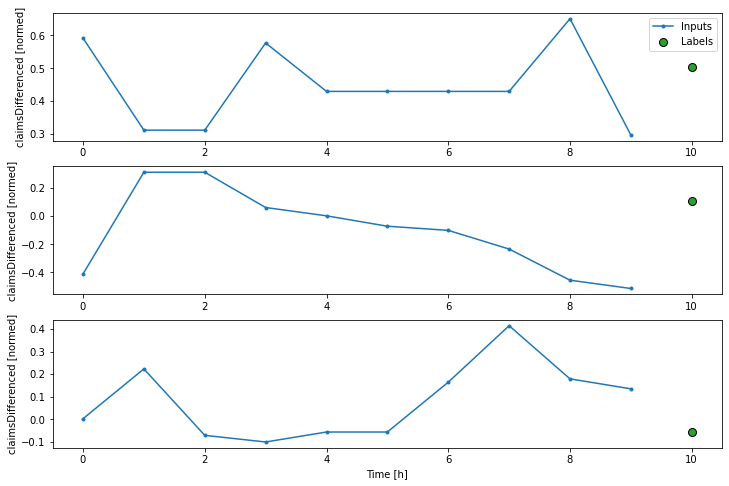

In [1117]:
w2.plot()

In [1118]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [1119]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [1120]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 10, 11), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [1121]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 10, 11)
Labels shape (batch, time, features): (32, 1, 1)


In [1122]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['claimsDifferenced'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['claimsDifferenced']

In [1123]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 11)
Labels shape (batch, time, features): (32, 1, 1)


In [1124]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [1125]:
column_indices = {name: i for i, name in enumerate(mergedDf.columns)}
baseline = Baseline(label_index=column_indices['claimsDifferenced'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

4/4 [==============================] - 0s 3ms/step - loss: 0.0218 - mean_absolute_error: 0.0987


In [1126]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['claimsDifferenced'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['claimsDifferenced']

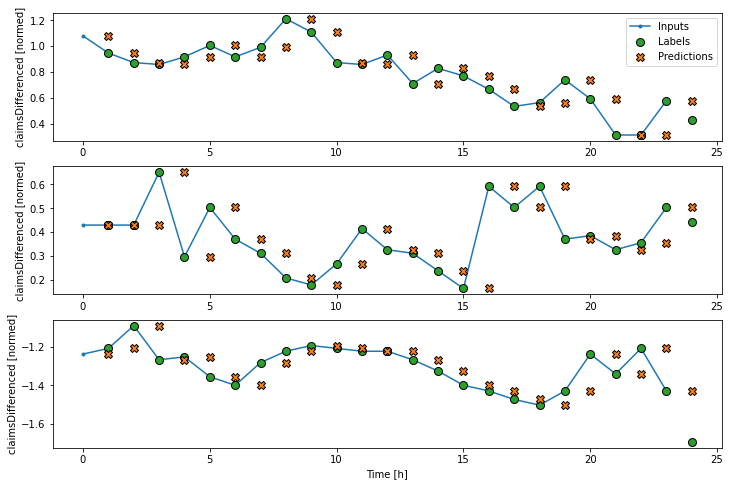

In [1127]:
wide_window.plot(baseline)

In [1128]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=1)
])

In [1129]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 11)
Output shape: (32, 1, 1)


In [1130]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [1131]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 0.5751 - mean_absolute_error: 0.6327 - val_loss: 14.9074 - val_mean_absolute_error: 3.6595
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 0.2392 - mean_absolute_error: 0.4088 - val_loss: 8.1755 - val_mean_absolute_error: 2.7050
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1077 - mean_absolute_error: 0.2613 - val_loss: 4.9331 - val_mean_absolute_error: 2.0999
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0935 - mean_absolute_error: 0.2357 - val_loss: 3.3925 - val_mean_absolute_error: 1.7405
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0781 - mean_absolute_error: 0.2151 - val_loss: 1.7317 - val_mean_absolute_error: 1.2316
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0675 - mean_absolute_error: 0.2029 - val_loss: 1.1580 - val_mean_absolute_error: 1.0045
Epoch 7/100
12/

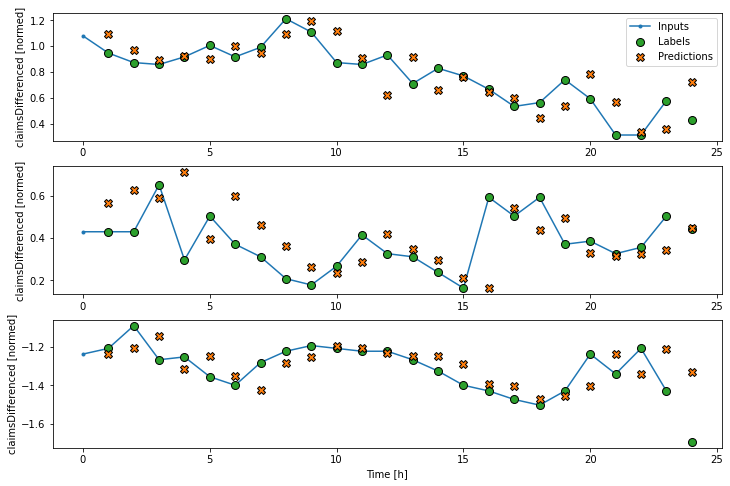

In [1132]:
wide_window.plot(linear)

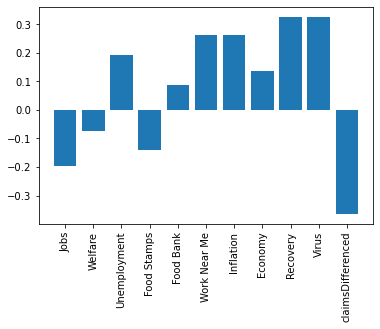

In [1133]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [1188]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, w2)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 1.0757 - mean_absolute_error: 0.9055 - val_loss: 2.6627 - val_mean_absolute_error: 1.5955
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 0.5422 - mean_absolute_error: 0.6214 - val_loss: 0.4241 - val_mean_absolute_error: 0.6167
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.2531 - mean_absolute_error: 0.4198 - val_loss: 0.1193 - val_mean_absolute_error: 0.2719
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.1448 - mean_absolute_error: 0.3071 - val_loss: 0.6862 - val_mean_absolute_error: 0.7285
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 1.2908 - mean_absolute_error: 1.0462


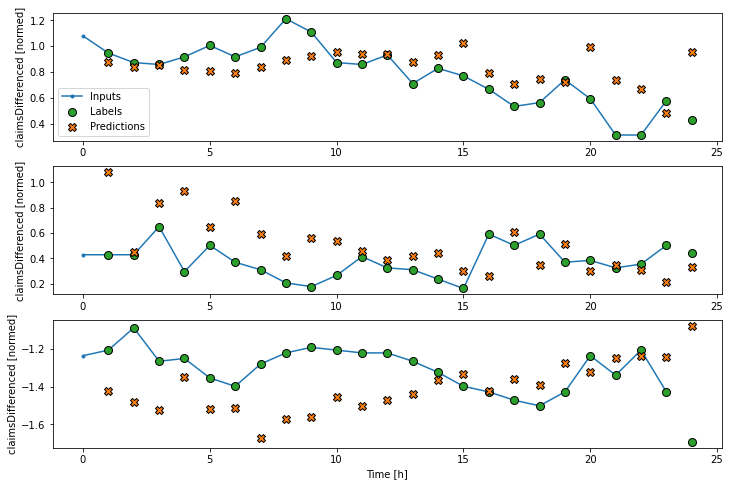

In [1189]:
wide_window.plot(dense)

In [1194]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(64, return_sequences=True),
#     tf.keras.layers.LSTM(32, return_sequences=True),
    
    tf.keras.layers.Dense(units=1),
    
    
])

In [1172]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 11)
Output shape: (32, 24, 1)


In [1214]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['claimsDifferenced'])
history = compile_and_fit(lstm_model, wide_window)


val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
11/11 [==============================] - 4s 56ms/step - loss: 0.0392 - mean_absolute_error: 0.1460 - val_loss: 0.2092 - val_mean_absolute_error: 0.4120
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0341 - mean_absolute_error: 0.1381 - val_loss: 0.2603 - val_mean_absolute_error: 0.4655
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3077 - mean_absolute_error: 0.5108


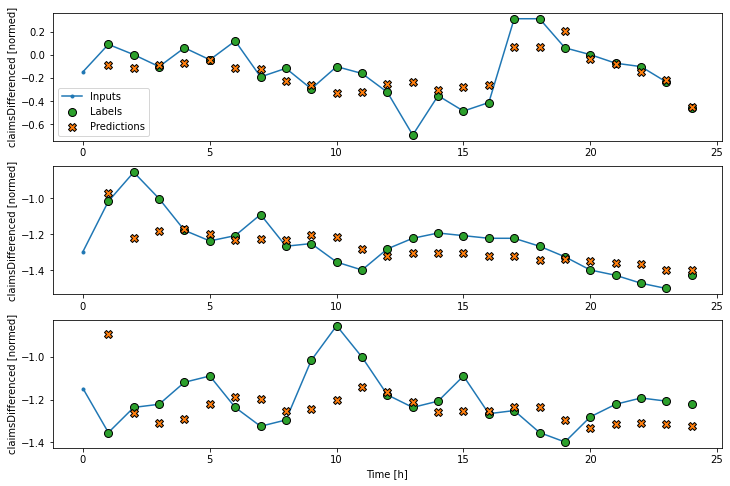

In [1215]:
wide_window.plot(lstm_model)

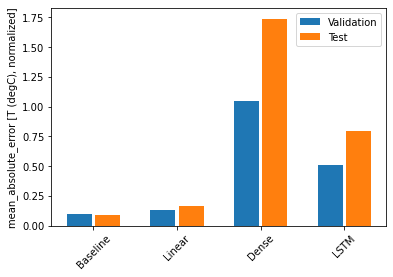

In [1216]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [1239]:
y_train=train_df["claimsDifferenced"]
x_train=train_df.drop("claimsDifferenced",axis=1)

In [1240]:
y_val=val_df["claimsDifferenced"]
x_val=val_df.drop("claimsDifferenced",axis=1)

In [1244]:
test_df.head()
y_test=test_df["claimsDifferenced"]
x_test=test_df.drop("claimsDifferenced",axis=1)

In [1396]:
from keras.preprocessing.sequence import TimeseriesGenerator
train=np.array(train_df,dtype="float32")
dtrain = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=train,
    targets=None,
    sequence_length=12,
    sequence_stride=1,
    shuffle=True,
    batch_size=32,)

test=np.array(test_df,dtype="float32")[0:12]
dtest = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=test[0:12],
    targets=None,
    sequence_length=12,
    sequence_stride=1,
    shuffle=True,
    batch_size=32,)
    
traingenerator = TimeseriesGenerator(x_train, y_train, length=12, batch_size=16)
valgenerator = TimeseriesGenerator(x_val, y_val, length=12, batch_size=16)
testgenerator = TimeseriesGenerator(np.array(x_test,dtype="float32")[0:13], np.array(x_test,dtype="float32")[0:13], length=12, batch_size=1)

In [1397]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.Input(
        shape=(12,11)
    ),
    tf.keras.layers.LSTM(64, return_sequences=True),
#     tf.keras.layers.LSTM(32, return_sequences=True),
    
    tf.keras.layers.Dense(units=1),
])
def compile_and_fit(model, ds,valgenerator,patience=2):
  MAX_EPOCHS=100
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanSquaredError()])

  history = model.fit(generator, epochs=MAX_EPOCHS,
                      validation_data=valgenerator,
                      callbacks=[early_stopping])
compile_and_fit(lstm_model,traingenerator,valgenerator)

Epoch 1/100
23/23 [==============================] - 2s 27ms/step - loss: 0.7297 - mean_squared_error: 0.7297 - val_loss: 1.2471 - val_mean_squared_error: 1.2471
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4160 - mean_squared_error: 0.4160 - val_loss: 0.2733 - val_mean_squared_error: 0.2733
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1892 - mean_squared_error: 0.1892 - val_loss: 0.1857 - val_mean_squared_error: 0.1857
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1585 - mean_squared_error: 0.1585 - val_loss: 0.1581 - val_mean_squared_error: 0.1581
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1458 - mean_squared_error: 0.1458 - val_loss: 0.1425 - val_mean_squared_error: 0.1425
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1349 - mean_squared_error: 0.1349 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 7/100
23/23 [==============

In [1399]:
x=lstm_model.predict(testgenerator)
print(x,testgenerator)

[[[-1.530127 ]
  [-1.5149362]
  [-1.3742157]
  [-1.5162257]
  [-1.5306109]
  [-1.6035753]
  [-1.6341403]
  [-1.6514127]
  [-1.6515608]
  [-1.6273419]
  [-1.7010225]
  [-1.6953499]]] <tensorflow.python.keras.preprocessing.sequence.TimeseriesGenerator object at 0x0000025132541070>


In [1384]:
test_df[10:].head()

,Jobs,Welfare,Unemployment,Food Stamps,Food Bank,Work Near Me,Inflation,Economy,Recovery,Virus,claimsDifferenced
date,,,,,,,,,,,
2019-03-09,0.245007,0.298347,-0.977799,-1.527212,0.330134,15.526023,1.632507,1.766909,0.948448,-0.110490,-1.797072
2019-03-16,0.245007,0.298347,-1.168690,-1.527212,0.330134,14.062879,1.835467,1.836863,1.024998,-0.155025,-1.900286
2019-03-23,0.346314,-1.662216,-1.168690,-1.527212,0.330134,16.989167,2.241388,1.696955,0.910173,-0.155025,-1.944521
2019-03-30,0.396967,0.298347,-1.168690,-0.071217,0.330134,14.062879,2.038428,1.836863,1.024998,-0.155025,-2.003501
2019-04-06,0.498273,0.298347,-1.168690,-0.071217,0.330134,15.526023,1.835467,1.906817,0.871898,-0.110490,-2.121460


,Jobs,Welfare,Unemployment,Food Stamps,Food Bank,Work Near Me,Inflation,Economy,Recovery,Virus,claimsDifferenced
date,,,,,,,,,,,
2019-01-05,0.903499,0.298347,-0.596016,2.840773,0.330134,14.062879,1.226586,1.557047,1.063273,0.023115,-1.900286
2019-01-12,0.802193,0.298347,-0.596016,5.752764,0.330134,15.526023,1.429547,1.976771,1.139823,-0.065955,-1.944521
2019-01-19,0.548927,0.298347,-0.596016,1.384778,0.330134,15.526023,1.632507,1.766909,0.986723,-0.155025,-2.003501
2019-01-26,0.498273,0.298347,-0.596016,-0.071217,0.330134,12.599735,1.632507,1.836863,0.948448,-0.155025,-1.634879
2019-02-02,0.447620,0.298347,-0.977799,-0.071217,0.330134,14.062879,1.835467,2.116679,1.063273,0.023115,-1.679113
